### Hive usage through iPython notebook

In [5]:
import pandas as pd
import matplotlib.pylab as pl 
import re
%matplotlib inline

# Compose Hive query string
qry_str = "hive -S -e 'set hive.cli.print.header=true; \
select * from survey.survey_responses limit 100000' "

# Embed the query in SSH, make sure to ignore stderr
ssh_qry = ''' ssh iac-prod "%s" 2>/dev/null | awk -F"\t" 'NF==119 {print}' ''' % (qry_str)

# Execute the query in Command line
results = !$ssh_qry

# Create table (list of lists) by splitting on TAB
table = [row.split("\t") for row in results]

# Create data frame
df = pd.DataFrame(table[1:], columns=table[0])

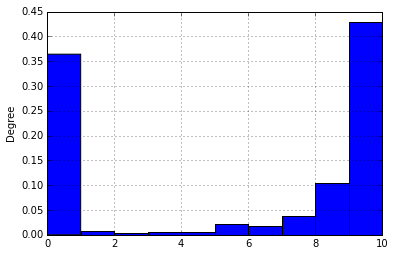

In [6]:
# Plot histogram for answer_0
df["answer_0"].apply(lambda x: int(x) if re.match("^[0-9]+$", x) else 0).plot(kind="hist", normed=True, bins=10)
pl.show()